## Logistic Regression

### Ingesting and preparing data

In [1]:
import pandas as pd
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
np.unique(y)

array([0, 1, 2])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
    
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Perform logistic regression

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
lr = LogisticRegression(C=1000.0, random_state=0) 
# "C" controls overfitting, lower C -> less overfitting
lr.fit(X_train_std, y_train)
# Fit the model on training dataset


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### Predicting using learned model

In [7]:
y_pred = lr.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


#### Predicting individual sample

In [8]:
a  = lr.predict_proba(X_test_std[0, :].reshape(1, -1)) 
#np.reshape: Gives a new shape to an array without changing its data.
np.around(a,decimals=3)
# a has 93.7% of chance belongs to Virginica class
#array([[0.   , 0.061, 0.939]])
#0: probability belongs to first catergory
#0.061: probability belongs to second catergory
#0.939: probability belongs to third catergory

array([[0.   , 0.061, 0.939]])

In [9]:
y_test[0]
#Accutual category of row 0 is 2
#prediction has 93.7% of chance belongs to category 2

2

In [10]:
b  = lr.predict_proba(X_test_std[1, :].reshape(1, -1)) 
np.around(b,decimals=3)

array([[0.001, 0.999, 0.   ]])

In [11]:
y_test[1]

1

In [12]:
c  = lr.predict_proba(X_test_std[2, :].reshape(1, -1)) 
np.around(c,decimals=3)

array([[0.816, 0.184, 0.   ]])

In [13]:
y_test[2]

0

In [14]:
d  = lr.predict_proba(X_test_std[3, :].reshape(1, -1)) 
np.around(d,decimals=3)

array([[0.   , 0.415, 0.585]])

In [15]:
y_test[3]

2

### Plot the points

In [16]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='+',
                    s=55, label='test set')

# end of module

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


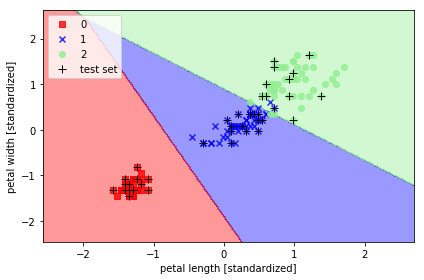

In [18]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_linear.png', dpi=300)
plt.show()

### Precision, recall, F1-score

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### Variance vs Bias
- Variance:
    
    Measures variability of model predictions if we retrained model on different subsets of training dataset
    
    If variance is high, model is sensitive to randomness in training data
    
- Bias:
    
    Measures how far off predictions are from correct values if model is rebuilt multiple times on different training sets
    
    Measure of systematic error not due to randomness

### Regularization
- Tune the model complexity via regularization
- Helps to find a good bias-variance treadeoff
- Parameter "C" in Logistic Regression method:
    
    Lower the C, higher the regularization strength, and lesser the overfitting (but more underfitting)



In [20]:
# Different accuracy with varies "C"
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    y_pred = lr.predict(X_test_std)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.60
Accuracy: 0.60
Accuracy: 0.60
Accuracy: 0.60
Accuracy: 0.60
Accuracy: 0.80
Accuracy: 0.96
Accuracy: 0.98
Accuracy: 0.98
Accuracy: 0.98


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [21]:
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

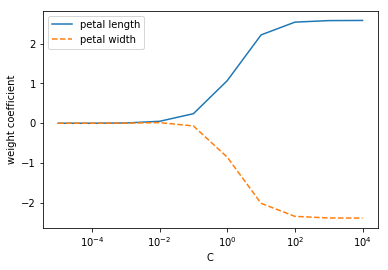

In [22]:
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('./figures/regression_path.png', dpi=300)
plt.show()

As we decrease C, it become less overfitting

## Support Vector Machines (SVM)

In [23]:
from sklearn.svm import SVC

In [24]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


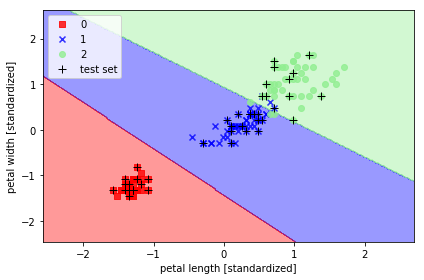

In [25]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_linear.png', dpi=300)
plt.show()

In [26]:
y_pred = svm.predict(X_test_std)

In [27]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Data Preprocessing

In [29]:
from io import StringIO

In [30]:
# Creating a sample csv data and
#dataframe with null values
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))

In [31]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


### Drop missing values

In [32]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [33]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [ 0., 11., 12., nan]])

In [34]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [35]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [36]:
df.dropna(how='all')
# ‘how = all’ : If all values are NA, drop that row or column.

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [37]:
df1 = df.copy()
df1['A'][1] = np.nan

In [38]:
df1

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,NaN,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [39]:
df1.dropna(thresh=3)
# thresh: Require that many non-NA values
# remove rows with at least 3 non-nan values

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


In [40]:
df.dropna(subset=['C'])
# subset: drop row with nan under column C

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


In [41]:
from sklearn.preprocessing import Imputer

In [42]:
imr = Imputer(missing_values='NaN', strategy='mean',axis=1)

imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [ 0.        , 11.        , 12.        ,  7.66666667]])

In [43]:
imr2 = Imputer(missing_values='NaN', strategy='mean',axis=1)

imr2 = imr.fit(df)
imputed_data2 = imr.transform(df.values)
imputed_data2

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [ 0.        , 11.        , 12.        ,  7.66666667]])

### Handling categorical data

In [44]:
df = pd.DataFrame([
['green ','M',10.1,'class1'],
['red','L',13.5,'class2'],
['blue','XL',15.3,'class1']])
df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [45]:
# Mapping ordinal features
size_mapping = {
'XL': 3,
'L': 2,
'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [46]:
# Reverting to the original categorical variables
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'] = df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [47]:
color_mapping = {
    'green ': 4,
    'red': 5,
    'blue': 6
}
df['color'] = df['color'].map(color_mapping)
df

,color,size,price,classlabel
0,4,M,10.1,class1
1,5,L,13.5,class2
2,6,XL,15.3,class1


In [49]:
inv_color_mapping = {v: k for k, v in color_mapping.items()}
df['color'] = df['color'].map(inv_color_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [53]:
class_mapping = {
	label:idx for idx,label in
	enumerate(np.unique(df['classlabel']))}

class_mapping

{0: 0, 1: 1}

In [55]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


#### Using Scikit-learn module to encoding

In [56]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y
class_le.inverse_transform(y)

array([0, 1, 0], dtype=int64)

### One-hot encoding
- To encode order implied by number

In [57]:
size_mapping = {
'XL': 3,
'L': 2,
'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [58]:
X = df[['color', 'size', 'price']].values

In [59]:
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()
# OneHotEncoder only operates on array

pd.get_dummies(df[['price', 'color', 'size']])
# There is no order implications by using either OneHotEncoder or get_dummies

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [62]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


### Partitioning a dataset into training and test sets

In [64]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [65]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

## Feature scaling
- When to scale:
    - Logistic regression, SVM, Perceptrons, Neural Networks
    - K-NN with a Euclidean distance measure with features contributing equally
    - K-means, Linear discriminant analysis, PCA, Kernel principal component analysis
    - Decision trees, Random forests - no need to worry about feature scaling
- Two types of feature scaling:
    - Normalization
    - Standardization

### Normalization
- Bring feature to [0,1] range
- Sensitive to outliers

In [66]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

### Standardization
- Many linear models initialize weights to 0 or small random values close to 0
- Sometimes standardization (mean 0, std 1) helps learn weights better
- Standardization preserves useful information about outliers
- Algorithm less sensitive to outliers than in min-max scaling

In [69]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

#### When to use
- Normalize:
    - distribution of data is unkonw
    - distribution is known to be not Gaussian
    - outliers are not a concern
    - std very small
    - algorithm does not make assumptions about the distribution of data ( e.g. k-nn and neural network)
- Standardize otherwise

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, # number of trees
                                random_state=0,
                                n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_ # Extract feature-importances
indices = np.argsort(importances)[::-1] # Sort feature-importances

In [71]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916
